In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
# Step 1: Load the Iris dataset



In [9]:
data = load_iris()
X = data.data
y = data.target

In [10]:
# Step 2: Standardize the data (optional but recommended)


In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
# Step 3: Calculate the mean vectors for each class


In [13]:
mean_vectors = []
for cl in np.unique(y):
    mean_vectors.append(np.mean(X[y == cl], axis=0))

In [14]:
# Step 4: Compute the scatter matrices (within-class and between-class)


In [15]:
within_class_scatter = np.zeros((X.shape[1], X.shape[1]))
between_class_scatter = np.zeros((X.shape[1], X.shape[1]))
overall_mean = np.mean(X, axis=0)

for cl, mv in zip(np.unique(y), mean_vectors):
    class_scatter = np.cov(X[y == cl].T)
    within_class_scatter += class_scatter
    between_class_scatter += len(X[y == cl]) * ((mv - overall_mean).reshape(-1, 1) @ (mv - overall_mean).reshape(1, -1))

In [16]:
# Step 5: Compute the eigenvalues and eigenvectors of (inv(within_class_scatter) * between_class_scatter)


In [17]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(within_class_scatter) @ between_class_scatter)

In [18]:
# Step 6: Sort the eigenvalues and eigenvectors in descending order


In [19]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

In [20]:
# Step 7: Choose the top k eigenvectors to form a projection matrix W


In [21]:
k = 2  # Number of components to keep
W = np.hstack((eigen_pairs[i][1].reshape(-1, 1) for i in range(k)))

C:\Users\SWATHI\AppData\Local\Temp\ipykernel_9256\3810274270.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  W = np.hstack((eigen_pairs[i][1].reshape(-1, 1) for i in range(k)))


In [22]:
# Step 8: Project the data onto the new feature subspace



In [23]:
X_lda = X.dot(W)

In [24]:
# Step 9: Visualize the LDA projection graph



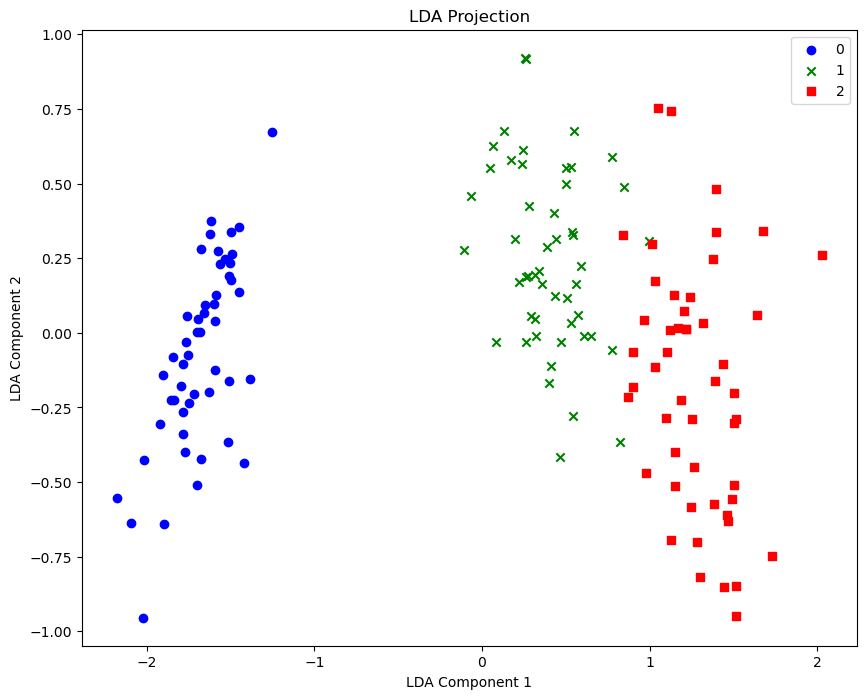

In [25]:
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r']
markers = ['o', 'x', 's']

for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X_lda[y == l, 0], X_lda[y == l, 1], c=c, label=l, marker=m)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection')
plt.legend()
plt.show()